# Publications and copies

A notebook that provides an overview of copied poems in the dataset in relation to the publications.

## Notebook setup

Ensure that necessary libraries are install and imported into the workplace.

In [1]:
# install libraries
!pip install -r ../requirements.txt

# import libraries
import visualising_poetry.data as vpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

# get data and process (if necessary)
vpd.setup_if_needed()

# get data as a single data frame
df = vpd.complete_dataset()

Count the number of times that a publications has the first (discovered) publication of a poem. 

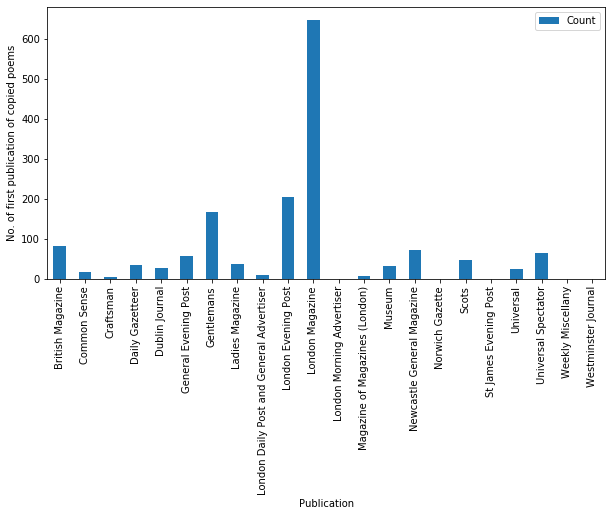

In [4]:
# get the copies as a dataset
copied_df = vpd.copied_poems(df)

# axes
pubs = vpd.publication_list(copied_df)
count = ['Count']

# data frame to track counts
count_df = pd.DataFrame(np.zeros(shape=(pubs.size, 1)), columns=count, index=pubs)

# get the first occurrence of the poem
copied_grouped_first_df = copied_df.sort_values([vpd.REF_NO, vpd.PRINTED_DATE]).groupby(
    vpd.REF_NO)[[vpd.REF_NO, vpd.PUB_TITLE, str(vpd.PRINTED_DATE)[:10]]].nth(0)[vpd.PUB_TITLE]

for title in copied_grouped_first_df:
    count_df.at[title, count[0]] += 1

# display graph
count_df.plot(kind='bar', figsize=(10,5))
plot.xlabel('Publication')
plot.ylabel('No. of first publication of copied poems')
plot.show()